In [1]:
# import os
# import sys
# import random
# import warnings

# import numpy as np
# import pandas as pd

# import matplotlib.pyplot as plt
# from tqdm import tqdm
# from itertools import chain
# from skimage.io import imread, imshow, imread_collection, concatenate_images
# from skimage.transform import resize
# from skimage.morphology import label
# import cv2
# from keras.models import Model, load_model
# from keras.layers import Input
# from keras.layers.core import Dropout, Lambda
# from keras.layers.convolutional import Conv2D, Conv2DTranspose
# from keras.layers.pooling import MaxPooling2D
# from keras.layers.merge import concatenate
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras import backend as K
# import re
# import tensorflow as tf

# from scipy import ndimage as ndi
# from skimage.morphology import watershed
# from skimage.feature import peak_local_max
# from sklearn.cluster import MeanShift
# import cv2

# # Set some parameters
# IMG_WIDTH = 512
# IMG_HEIGHT = 512
# IMG_CHANNELS = 3
# TRAIN_PATH = 'DIC-C2DH-HeLa/01/'
# TEST_PATH = 'COMP9517 20T2 Group Project Image Sequences/DIC-C2DH-HeLa/Sequence 3/'

# warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
# seed = 42
# random.seed = seed
# np.random.seed = seed

In [2]:
# # Get train and test IDs
# train_ids = next(os.walk(TRAIN_PATH))[2]
# test_ids = next(os.walk(TEST_PATH))[2]
# print(train_ids)

In [3]:
# img=cv2.imread('DIC-C2DH-HeLa/01_ST/SEG/man_seg000.tif', -1)
# plt.imshow(img)

# img.shape

In [4]:
# X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH,3), dtype=np.uint8)
# Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.bool)
# print('Getting and resizing train images and masks ... ')
# sys.stdout.flush()
# for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
#     path = TRAIN_PATH
#     img = cv2.imread(path+id_)
# #     img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
#     X_train[n] = img
#     mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
#     num=''.join(re.findall(r'\d+', id_))
#     mask_ = cv2.imread('DIC-C2DH-HeLa/01_ST/SEG/man_seg'+ num+'.tif', -1)
#     mask_ = cv2.resize(mask_, (IMG_HEIGHT, IMG_WIDTH))
#     mask_=mask_[:,:,np.newaxis]
#     mask = np.maximum(mask, mask_)
# # for mask_file in next(os.walk('DIC-C2DH-HeLa/01_ST/SEG/'))[2]:
# #     mask_ = cv2.imread('DIC-C2DH-HeLa/01_ST/SEG/'+ mask_file, -1)
# # #     mask_ = cv2.cvtColor(mask_, cv2.COLOR_BGR2GRAY)
# #     mask_ = cv2.resize(mask_, (IMG_HEIGHT, IMG_WIDTH))
# #     mask = np.maximum(mask, mask_)
#     Y_train[n] = mask

# # Get and resize test images
# X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH,3), dtype=np.uint8)
# sizes_test = []
# print('Getting and resizing test images ... ')
# sys.stdout.flush()
# for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
#     path = TEST_PATH
#     img = cv2.imread(path+ id_)
# #     img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     sizes_test.append([img.shape[0], img.shape[1]])
#     img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
#     X_test[n] = img

# print('Done!')

In [5]:
# # Check if training data looks all right
# ix = random.randint(0, len(train_ids))
# imshow(X_train[ix])
# plt.show()
# # imshow(np.squeeze(Y_train[1]))
# # plt.show()

In [6]:
# # Define IoU metric
# def mean_iou(y_true, y_pred):
#     prec = [] 
#     for t in np.arange(0.5, 1.0, 0.05):
#         y_pred_ = tf.compat.v1.to_int32(y_pred > t)
#         score, up_opt = tf.compat.v1.metrics.mean_iou(y_true, y_pred_, 2)
# #         tf.compat.v1.Session().run(tf.compat.v1.local_variables_initializer())
#         with tf.control_dependencies([up_opt]):
#             score = tf.identity(score)
#         prec.append(score)
#     return K.mean(K.stack(prec), axis=0)

In [7]:
# inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
# s = Lambda(lambda x: x / 255) (inputs)

# c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
# c1 = Dropout(0.1) (c1)
# c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
# p1 = MaxPooling2D((2, 2)) (c1)

# c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
# c2 = Dropout(0.1) (c2)
# c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
# p2 = MaxPooling2D((2, 2)) (c2)

# c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
# c3 = Dropout(0.2) (c3)
# c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
# p3 = MaxPooling2D((2, 2)) (c3)

# c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
# c4 = Dropout(0.2) (c4)
# c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
# p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

# c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
# c5 = Dropout(0.3) (c5)
# c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

# u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
# u6 = concatenate([u6, c4])
# c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
# c6 = Dropout(0.2) (c6)
# c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

# u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
# u7 = concatenate([u7, c3])
# c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
# c7 = Dropout(0.2) (c7)
# c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

# u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
# u8 = concatenate([u8, c2])
# c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
# c8 = Dropout(0.1) (c8)
# c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

# u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
# u9 = concatenate([u9, c1], axis=3)
# c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
# c9 = Dropout(0.1) (c9)
# c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

# outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

# model = Model(inputs=[inputs], outputs=[outputs])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.MeanIoU(num_classes=2)])
# model.summary()

In [8]:
# earlystopper = EarlyStopping(patience=5, verbose=1)
# checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
# results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=50, 
#                     callbacks=[earlystopper, checkpointer])

In [9]:
# pred=model.predict(X_test, verbose=1)

In [10]:
# pred.shape

In [11]:
# pred=model.predict(X_test)

In [12]:
# plt.imshow(pred[2].reshape(IMG_HEIGHT, IMG_WIDTH))

In [13]:
# def perform_watershed(image):
#     distance = ndi.distance_transform_edt(image)
#     peak = peak_local_max(distance,indices=False, labels=image)
#     markers = ndi.label(peak)[0]
#     ws_labels = watershed(-distance, markers, mask=image)
#     return ws_labels

In [14]:
# plt.imshow(ws_img)

In [15]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
import cv2
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import re
import tensorflow as tf
# Set some parameters
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 1
TRAIN_PATH = 'DIC-C2DH-HeLa/01/'
TEST_PATH = 'COMP9517 20T2 Group Project Image Sequences/DIC-C2DH-HeLa/Sequence 3/'

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed


def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = Lambda(lambda x: x / 255) (inputs)
#     inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model=Model([inputs], [conv10])

    model.compile(optimizer = Adam(lr = 0.01), loss = "binary_crossentropy", metrics = ['accuracy'])
    
    model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

In [32]:
# Get train and test IDs
train_ids = next(os.walk(TRAIN_PATH))[2]
test_ids = next(os.walk(TEST_PATH))[2]
print(train_ids)
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH
    img = cv2.imread(path+id_,0)
#     img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    img=img[:,:,np.newaxis]
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    num=''.join(re.findall(r'\d+', id_))
    mask_ = cv2.imread('DIC-C2DH-HeLa/01_ST/SEG/man_seg'+ num+'.tif', -1)
    mask_ = cv2.resize(mask_, (IMG_HEIGHT, IMG_WIDTH))
    mask_[mask_ > 0.5] = 1
    mask_[mask_ <= 0.5] = 0
    mask_=mask_[:,:,np.newaxis]
#     mask = np.maximum(mask, mask_)
# for mask_file in next(os.walk('DIC-C2DH-HeLa/01_ST/SEG/'))[2]:
#     mask_ = cv2.imread('DIC-C2DH-HeLa/01_ST/SEG/'+ mask_file, -1)
# #     mask_ = cv2.cvtColor(mask_, cv2.COLOR_BGR2GRAY)
#     mask_ = cv2.resize(mask_, (IMG_HEIGHT, IMG_WIDTH))
#     mask = np.maximum(mask, mask_)
    Y_train[n] = mask_

# Get and resize test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH
    img = cv2.imread(path+ id_, 0)
#     img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sizes_test.append([img.shape[0], img.shape[1]])
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    img=img[:,:,np.newaxis]
    X_test[n] = img

print('Done!')

['t007.tif', 't013.tif', 't012.tif', 't006.tif', 't010.tif', 't004.tif', 't038.tif', 't039.tif', 't005.tif', 't011.tif', 't029.tif', 't015.tif', 't001.tif', 't000.tif', 't014.tif', 't028.tif', 't002.tif', 't016.tif', 't017.tif', 't003.tif', 't064.tif', 't070.tif', 't058.tif', 't059.tif', 't071.tif', 't065.tif', 't073.tif', 't067.tif', 't066.tif', 't072.tif', 't076.tif', 't062.tif', 't063.tif', 't077.tif', 't049.tif', 't061.tif', 't075.tif', 't074.tif', 't060.tif', 't048.tif', 't045.tif', 't051.tif', 't079.tif', 't078.tif', 't050.tif', 't044.tif', 't052.tif', 't046.tif', 't047.tif', 't053.tif', 't080.tif', 't057.tif', 't043.tif', 't042.tif', 't056.tif', 't081.tif', 't083.tif', 't068.tif', 't040.tif', 't054.tif', 't055.tif', 't041.tif', 't069.tif', 't082.tif', 't026.tif', 't032.tif', 't033.tif', 't027.tif', 't031.tif', 't025.tif', 't019.tif', 't018.tif', 't024.tif', 't030.tif', 't008.tif', 't034.tif', 't020.tif', 't021.tif', 't035.tif', 't009.tif', 't023.tif', 't037.tif', 't036.tif', 't0

100%|██████████| 84/84 [00:00<00:00, 264.39it/s]

Getting and resizing test images ... 



100%|██████████| 115/115 [00:00<00:00, 433.46it/s]

Done!


In [33]:
model=unet()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, 256, 256, 64) 640         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_70 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_69[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_70[0][0]                  
______________________________________________________________________________________

In [34]:
earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('unet_membrane.hdf5', verbose=1, save_best_only=True)
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=50, 
                    callbacks=[earlystopper, checkpointer])

Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 8.0211 - accuracy: 0.4788 
Epoch 00001: val_loss improved from inf to 6.81786, saving model to unet_membrane.hdf5
5/5 [==============================] - 53s 11s/step - loss: 8.0211 - accuracy: 0.4788 - val_loss: 6.8179 - val_accuracy: 0.5580
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 8.0237 - accuracy: 0.4798 
Epoch 00002: val_loss did not improve from 6.81786
5/5 [==============================] - 52s 10s/step - loss: 8.0237 - accuracy: 0.4798 - val_loss: 6.8179 - val_accuracy: 0.5580
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 8.0237 - accuracy: 0.4798 
Epoch 00003: val_loss did not improve from 6.81786
5/5 [==============================] - 53s 11s/step - loss: 8.0237 - accuracy: 0.4798 - val_loss: 6.8179 - val_accuracy: 0.5580
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 8.0237 - accuracy: 0.4798 
Epoch 00004: val_loss did not improve from 6.81786
5/5 

In [35]:
pred=model.predict(X_test, verbose=1)

4/4 [==============================] - 17s 4s/step


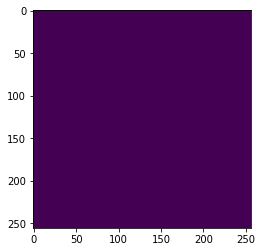

In [36]:
plt.imshow(pred[2].reshape(IMG_HEIGHT, IMG_WIDTH))